In [1]:
%pylab inline
import pandas as pd
import math
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import axes3d
from DF_lib import DF
from float_test import isfloat
from lat_util import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
data = search_engine_('R-B-Spin(-).txt',':')

In [4]:
E= 7007290000         # electron energy 7GeV
m= 510998.95          # rest mass energy of electron 511KeV
a= 0.001159652        # anomalous g factor for electron
c= 299792458          # speed of light
L= 5.902202           # length of both the B2E，BLA4lLE， BLA6RE, unit is metre
B= 0.22075143 #0.26282           # dipole strength of B2E in Tesla
ga= E/m               #lorentz boost fact
#SLa = 2.577           #Solen strength B2EAL
#SLb = 4.843           #Solen Srength B2EBL
#SRa = 3.608           #Solen strength B2EAR
#SRb = 3.942           #Solen Srength B2EBR

In [5]:
def SR(b,s):
    Wb = (1+a*ga)*b*c/E
    Ws = (1+a)*s*c/E
    W = sqrt(Wb**2+Ws**2)
    return Wb,Ws,W

In [6]:
Wb,Ws,W= SR(B,5)

In [7]:
ss = Wb/(1+a)*E/c
print(ss)

3.7268674265671664


In [8]:
Wb,Ws,W= SR(B,5)

In [9]:
Ws

0.21416275972844323

In [10]:
B*(1+a*ga)/(1+a)

3.7268674265671664

In [11]:
Wsmax = 5*c/E

In [12]:
if sqrt(2)*Wb > pi/(4*L):
    Wsmin = Wb
else:
    Wsmin = sqrt((pi/(4*L))**2-Wb**2)

if Wsmin<Wsmax:
    pass
else:
    sys.exit('solution does not exist')

# Given the veritcal initial spin (0,1,0), the spin motion is given by:

# $\begin{cases} \begin{align*} S_x &= -\frac{\omega_{//}}{\omega} \sin\omega s \\ S_y&= \frac{{\omega_{//}}^2}{{\omega}^2} \cos\omega s+\frac{{\omega_{\bot}}^2}{{\omega}^2}\\ S_z& = \frac{\omega_{//}\omega_{\bot}}{{\omega}^2} \big(1-\cos\omega s\big) \end{align*}\end{cases}$



# $ S_y = 0 \Rightarrow \omega^2_{//} \cos(2 \omega L) +  \omega^2_{\bot}  = 0 $ solve for the solenoid strength

# $\begin{cases} \begin{align*} \bar{S}_x &= -\frac{\omega_{//}}{\omega} \sin 2\omega L \\ \bar{S}_z& = \frac{\omega_{\bot}}{\omega_{//}} \end{align*}\end{cases}$


$ $

In [13]:
def funcy(ws):
    return ws**2*cos(sqrt(ws**2+Wb**2)*2*L)+Wb**2

In [14]:
def sol(Wsmin,Wsmax):
    ig = uniform(Wsmin,Wsmax)
    
    root = fsolve(funcy,ig)[0]
    
    for i in range(10):
        root = fsolve(funcy,root)[0]
    return root

In [15]:
def S(s,ws,wb,w):
    Sx = -ws/w*sin(w*s)
    Sy = ws**2/w**2*cos(w*s)+wb**2/w**2
    Sz = -ws*wb/w**2*cos(w*s)+ws*wb/w**2
    return Sx,Sy,Sz

In [16]:
def solver(wb,Wsmin,Wsmax,a):  #solenoid strength solver
    
    ws = sol(Wsmin,Wsmax)
    
    if Wsmin< ws < Wsmax:
        pass
    else:
        sys.exit('desired solution does not exist')
    
    w = sqrt(ws**2+wb**2)
    sx,sy,sz = S(2*L,ws,wb,w)
    
    theta = w*2*L*180/pi
    
    print ('solenoid strength: %s T'%(ws/(1+a)*E/c))
    print ('spin.x:',sx)
    print ('spin.y:',sy)
    print ('spin.z:',sz)
    print ('Rotation angle is : %s'%theta)
    return w,ws

In [17]:
W,Ws= solver(Wb,Wsmin,Wsmax,a)

solenoid strength: 3.8962877345824767 T
spin.x: -0.29167492299270564
spin.y: -5.551115123125783e-17
spin.z: 0.9565175060066591
Rotation angle is : 156.19518324797633


In [18]:
2*W*L/pi

0.8677510180443129

In [19]:
Sx,Sy,Sz = S(pi/W,Ws,Wb,W)

In [20]:
d =0.1
s = array(arange(0,2*pi/W,d))
Sx,Sy,Sz = S(s,Ws,Wb,W)

In [21]:
d =0.1
sl = array(arange(0,2*L,d))
SLx,SLy,SLz = S(sl,Ws,Wb,W)

In [22]:
x1 = [0,0]
y1 = [1,Wb**2/W**2]
z1 = [0,Wb*Ws/W**2]

In [23]:
x2 = [0,SLx[-1]]
y2 = [Wb**2/W**2,SLy[-1]]
z2 = [Wb*Ws/W**2, SLz[-1]]

In [24]:
def line(wb,ws,w):
    return 1-ws/wb*(wb*ws/w**2-0.05)

In [25]:
ry = line(Wb,Ws,W)

In [26]:
def S_G(wb,ws,w,si,s):       #to find spin at the exit of the dipole and the solenoid combined function magnet
    
    six = si[0]        # intial spin.x
    siy = si[1]        # intial spin.y
    siz = si[2]        # intial spin.z
             
    D = (wb*siy+ws*siz)/w  # find D
    
    #print('the amount of rotation is: %s degrees'%(w*s*180/pi))
            
    cc = (-ws*siy+wb*siz)/w  
    
    cs = six
        
    sx =  cc*sin(w*s)+cs*cos(w*s)
    
    sy = -ws/w*(cc*cos(w*s)-cs*sin(w*s))+wb/w*D
    
    sz =  wb/w*(cc*cos(w*s)-cs*sin(w*s))+ws/w*D
    
    return sx,sy,sz

In [27]:
s0 =(0,ry,Wb*Ws/W**2-0.05)

In [28]:
sg=S_G(Wb,Ws,W,s0,linspace(0,2*L,101))

In [29]:
print('exit spin:(%s, %s, %s)'%(SLx[-1],SLy[-1],SLz[-1]))

exit spin:(-0.2923472191236663, 0.00021462071459976695, 0.9563122175359927)


<IPython.core.display.Javascript object>


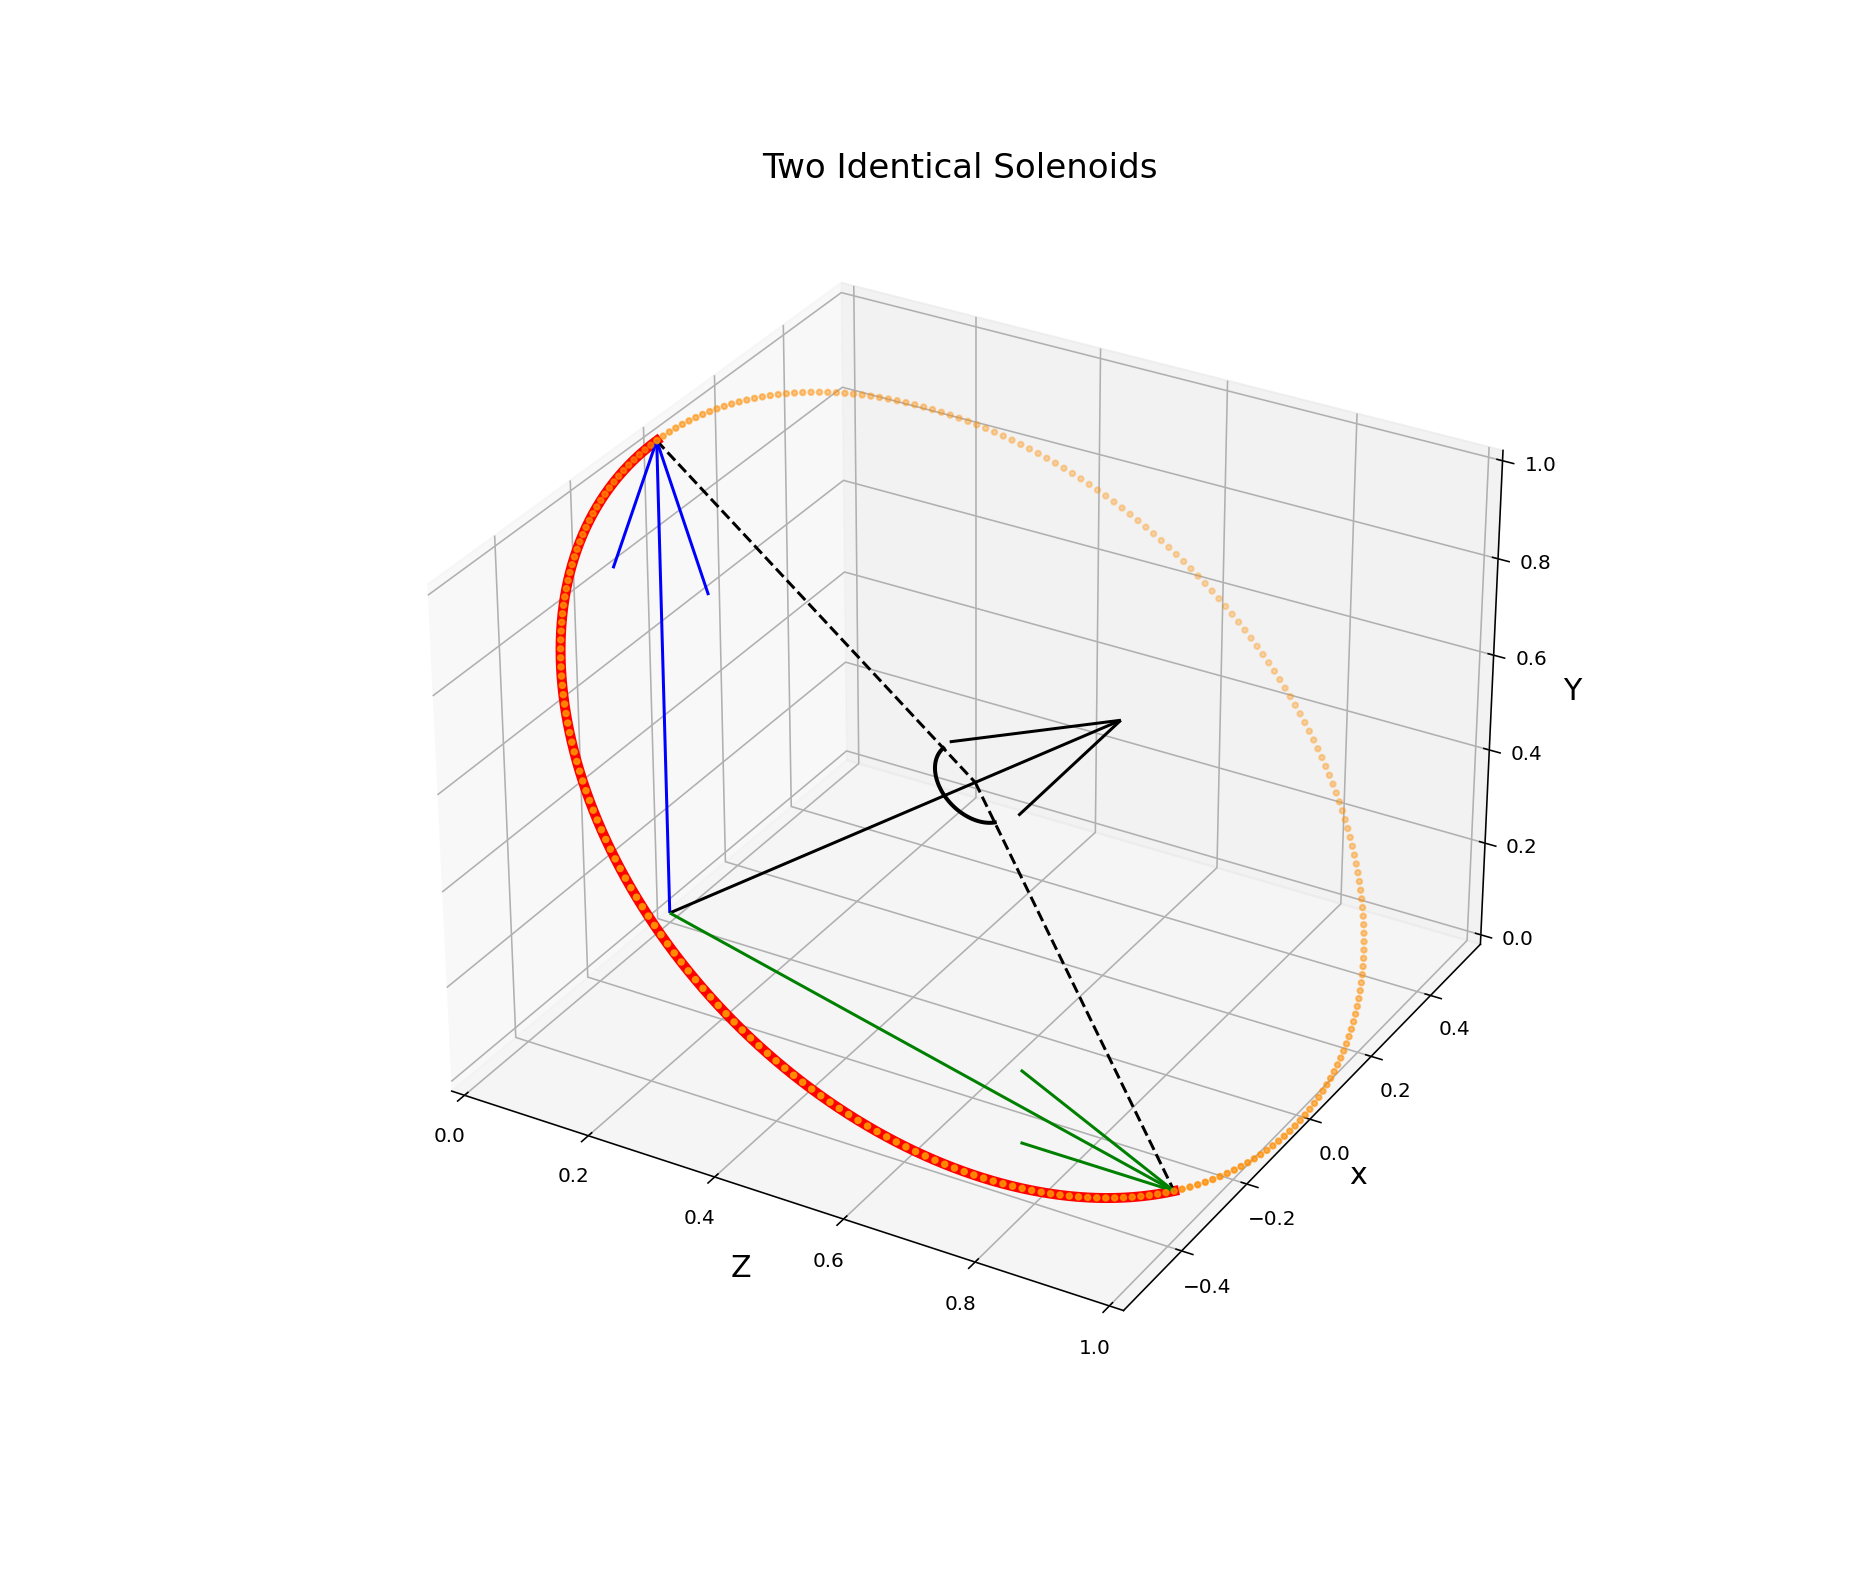

In [30]:
fig = figure(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Sz,Sx,Sy, color= 'darkorange', marker='.',s=30)
ax.plot(SLz,SLx,SLy,'r-',linewidth =5 )
ax.plot(sg[2], sg[0], sg[1],'k-',linewidth =2 )

ax.plot(z1,x1,y1,ls = '--', color = 'k')
ax.plot(z2,x2,y2,ls = '--',color = 'k')

ax.quiver(0, 0, 0, 0, 0, 1, color ='blue',alpha = 1)
ax.quiver(0, 0, 0, SLz[-1],SLx[-1],SLy[-1],color ='green',alpha = 1)

#ax.quiver(0, 0, 0, Sp[2],Sp[0],Sp[1],color ='blue',alpha = 0.5)
ax.quiver(0, 0, 0,Ws/W, 0 ,Wb/W,color ='k',alpha = 1)

    
ax.set_xlim([0, 1])
ax.set_ylim([-0.55,0.55])
ax.set_zlim([0, 1])
    
ax.set_title(r'Two Identical Solenoids', size =17) 
ax.set_xlabel(r'Z ',fontsize=15)
ax.set_ylabel(r'x ',fontsize=15)
ax.set_zlabel(r'Y',fontsize=15)
show()

# Non-identical solenoid strength

In [31]:
DF('R-B-Spin(-).txt',':')

,Index,name,key,s,l,B_field,spin.x,spin.y,spin.z
0,1617,BLA6RE,Sbend,142.221,5.902,0.1986,0.38066,0.001143,-0.92471
1,1623,BLA6RE,Sbend,150.468,5.902,0.1986,-0.39583,0.001143,-0.91832
2,1655,B2E,Sbend,175.085,5.902,0.22075,-0.96177,0.001143,-0.27384
3,1675,B2E,Sbend,192.682,5.902,0.22075,-0.82019,0.001143,0.57209
4,1707,B2E,Sbend,217.595,5.902,0.22075,-0.075245,0.001143,0.99716
5,1713,B2E,Sbend,225.842,5.902,0.22075,0.72506,0.001142,0.68869
6,1743,B2E,Sbend,250.755,5.902,0.22075,0.99198,0.001143,-0.12642
7,1763,B2E,Sbend,268.352,5.902,0.22075,0.52916,0.001143,-0.84852
8,1793,B2E,Sbend,293.265,5.902,0.22075,-0.32293,0.001142,-0.94642
9,1799,B2E,Sbend,301.513,5.902,0.22075,-0.93746,0.001143,-0.34809


In [32]:
#si = array([-0.395830,0.001143,-0.918320]) #R
si = array([-0.24806, 0.0011425, -0.96875]) #R
#si = array([0,1,0]) #L

In [33]:
#s2 = array([0.53232, -0.0009246, -0.84654]) #B2EL
#s2 = array([0.17962, -0.00092468, 0.98374]) #BLA4LEL
#s2 = array([-0.395830,0.001143,-0.918320]) #R
s2 = array([-0.24806, 0.0011425, -0.96875]) #R

S2x =s2[0]
S2y =s2[1]
S2z =s2[2]

In [34]:
def fg(ns):
    w1s,w2s =ns
    w1 = sqrt(w1s**2+Wb**2)
    w2 = sqrt(w2s**2+Wb**2)
    
    D = (Wb*S2y+w2s*S2z)/w2  # find D
    
    #print('the amount of rotation is: %s degrees'%(w*s*180/pi))
            
    cc = (-w2s*S2y+Wb*S2z)/w2  
    
    cs = S2x
        
    s1x =  -cc*sin(w2*L)+cs*cos(w2*L)
    
    s1y = -w2s/w2*(cc*cos(w2*L)+cs*sin(w2*L))+Wb/w2*D
    
    s1z =  Wb/w2*(cc*cos(w2*L)+cs*sin(w2*L))+w2s/w2*D
    
    
    return (s1x+w1s/w1*sin(w1*L), Wb*s1y+w1s*s1z-Wb)

In [35]:
def ug(w1s):
    
    w1 = sqrt(w1s**2+Wb**2)
    
    print('rotation angle is:', w1*L/pi*180)
    
    return (-w1s/w1*sin(w1*L), w1s**2/w1**2*cos(w1*L)+Wb**2/w1**2,\
           -w1s*Wb/w1**2*cos(w1*L)+w1s*Wb/w1**2)

In [36]:
def sg(w2s):
    w2 = sqrt(w2s**2+Wb**2)
    print('rotation angle is:', w2*L/pi*180)
    
    D = (Wb*S2y+w2s*S2z)/w2  # find D
    
    #print('the amount of rotation is: %s degrees'%(w*s*180/pi))
            
    cc = (-w2s*S2y+Wb*S2z)/w2  
    
    cs = S2x
        
    s1x = -cc*sin(w2*L)+cs*cos(w2*L)
    
    s1y = -w2s/w2*(cc*cos(w2*L)+cs*sin(w2*L))+Wb/w2*D
    
    s1z =  Wb/w2*(cc*cos(w2*L)+cs*sin(w2*L))+w2s/w2*D
    
    return (s1x,s1y,s1z)

In [37]:
L = -5.902202

In [38]:
for i in range(100):
    
    g1 = uniform(-0.23,0.23)
    g2 = uniform(-0.23,0.23)
    sol = fsolve(fg, (g1,g2))
    
    if abs(sol[0])<=0.23 and abs(sol[1])<=0.23:
        break
    else:
        pass

In [39]:
sol

array([-0.18082787, -0.15198936])

In [40]:
sol/(1+a)*E/c

array([-4.22173947, -3.54845449])

In [41]:
fg(sol)

(4.440892098500626e-16, 1.887379141862766e-15)

In [42]:
ug(sol[0])

rotation angle is: -81.56930221260671


(-0.7415778891809264, 0.5203806796288825, -0.42339837333998337)

In [43]:
sg(sol[1])

rotation angle is: -74.53811695478636


(-0.7415778891809259, 0.5204203371113084, -0.423363364505202)

In [44]:
L = 5.902202

In [45]:
wsb = sol[1]
wsa = sol[0]

In [46]:
s1 = S_G(Wb,wsb,sqrt(wsb**2+Wb**2),si,L)

In [47]:
s1

(-0.7415778891809259, 0.5204203371113084, -0.423363364505202)

In [48]:
st = S_G(Wb,wsa,sqrt(wsa**2+Wb**2),s1,L)

In [49]:
st

(5.232765192160482e-05, 1.0000058143039576, 5.132751597636265e-06)

In [50]:
s2

array([-0.24806  ,  0.0011425, -0.96875  ])

In [51]:
s0= si 
wlb = sqrt(wsb**2+Wb**2)
slb = arange(0, 2*pi/wlb+0.1, 0.1)
Sglb= S_G(Wb,wsb,wlb,s0,slb)  # when particle passing through the B2EBL spin rotator

slbL = arange(0, L+0.1, 0.1)
SglbL=S_G(Wb,wsb,wlb,s0,slbL)  # when particle passing through the B2EBL spin rotator 

In [52]:
s1 = array([SglbL[0][-1],SglbL[1][-1],SglbL[2][-1]])

wla = sqrt(wsa**2+Wb**2)
sla = arange(0, 2*pi/wla+0.1, 0.1)
Sgla= S_G(Wb,wsa,wla,s1,sla)  # when particle passing through the B2EAL spin rotator 

slaL = arange(0, L+0.1, 0.1)
SglaL=S_G(Wb,wsa,wla,s1,slaL)  # when particle passing through the B2EAL spin rotator 

In [53]:
(SglaL[0][-1],SglaL[1][-1],SglaL[2][-1])

(0.033686401193246215, 0.9994373619076744, 0.001348111243852368)

<IPython.core.display.Javascript object>


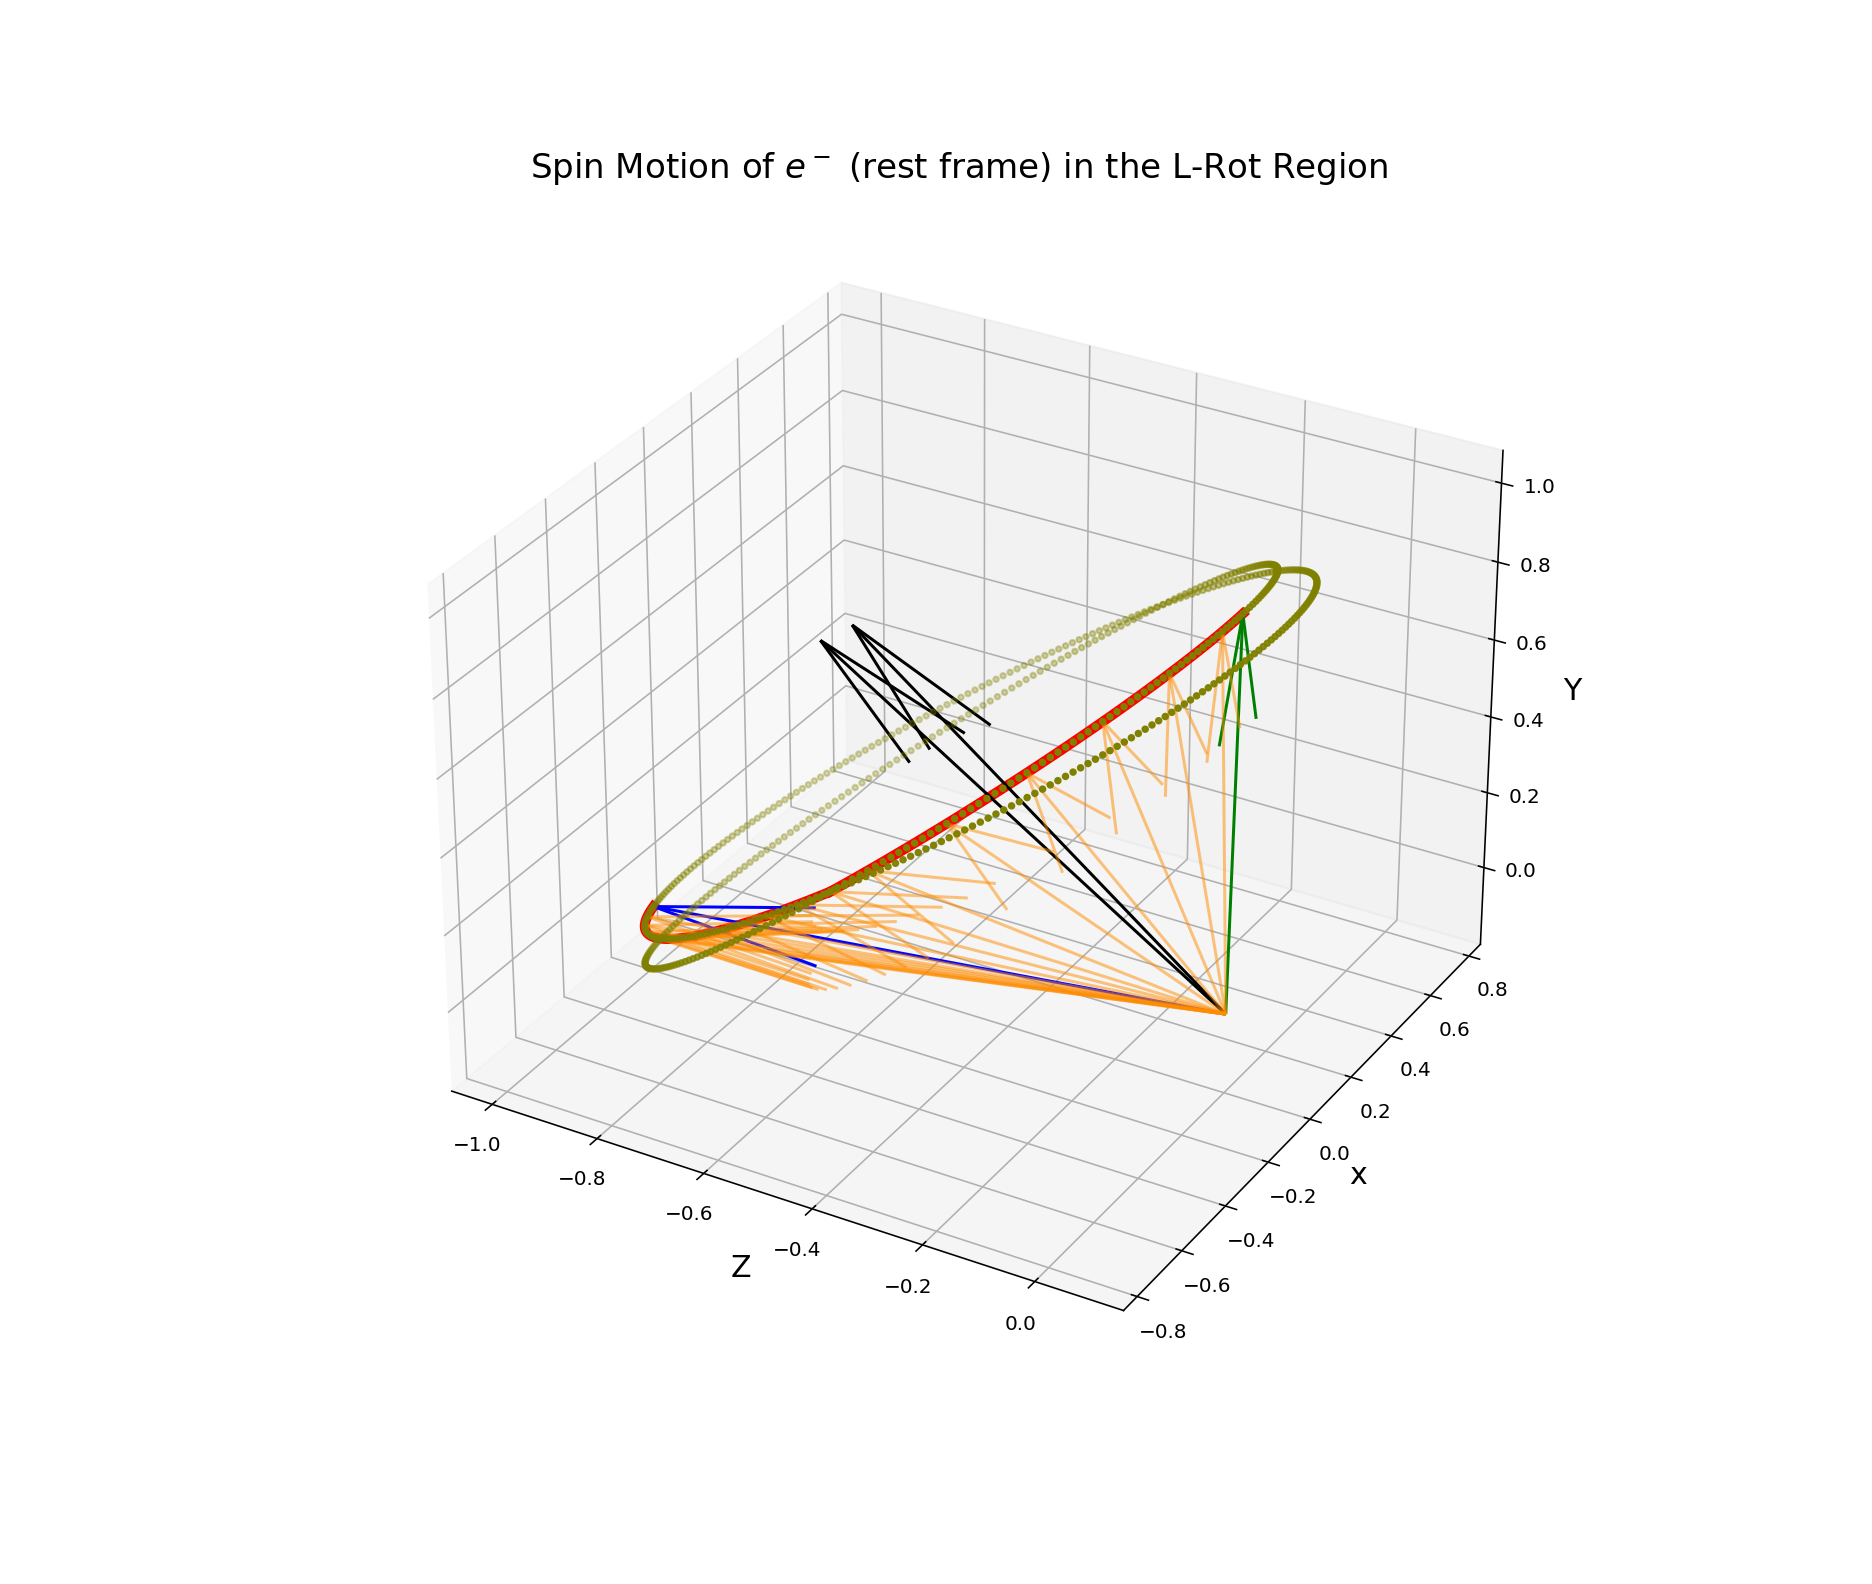

In [54]:
fig = figure(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Sglb[2],Sglb[0],Sglb[1], color= 'olive', marker='.',s=30)
ax.scatter(Sgla[2],Sgla[0],Sgla[1], color= 'olive', marker='.',s=30)

ax.plot(SglbL[2],SglbL[0],SglbL[1],'r-',linewidth = 5 )
ax.plot(SglaL[2],SglaL[0],SglaL[1],'r-',linewidth = 5 )

ax.quiver(zeros(len(SglbL[2][5::5])), zeros(len(SglbL[2][5::5])), zeros(len(SglbL[2][5::5])), \
          SglbL[2][5::5],SglbL[0][5::5],SglbL[1][5::5],color ='darkorange',alpha = 0.5)

ax.quiver(zeros(len(SglaL[2][5::10])), zeros(len(SglaL[2][5::10])), zeros(len(SglaL[2][5::10])), \
          SglaL[2][5::10],SglaL[0][5::10],SglaL[1][5::10],color ='darkorange',alpha = 0.5)

ax.quiver(0, 0, 0, SglaL[2][-1],SglaL[0][-1],SglaL[1][-1],color ='green',alpha = 1)

ax.quiver(0, 0, 0, s0[2], s0[0], s0[1], color ='blue',alpha = 1)
ax.quiver(0, 0, 0, wsa/wla, 0 , Wb/wla,color ='k',alpha = 1)
ax.quiver(0, 0, 0, wsb/wlb, 0 , Wb/wlb,color ='k',alpha = 1)
    
#ax.set_xlim([-1, 0])
#ax.set_ylim([-0.6,0.6])
#ax.set_zlim([0, 1])
    
ax.set_title(r'Spin Motion of $e ^-$ (rest frame) in the L-Rot Region', size =17) 
ax.set_xlabel(r'Z ',fontsize=15)
ax.set_ylabel(r'x ',fontsize=15)
ax.set_zlabel(r'Y',fontsize=15)
show()